# Voxel occupancy as global feature

In this notebook we will use the global features generated in the `voxelgrid_generate_features` notebook to train a simple linear classifier.

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['image.interpolation'] = None
plt.rcParams['image.cmap'] = 'binary'

## Load data

In [3]:
with np.load("data/voxelgrid.npz") as npz:
    
    data = {name: array for name, array in npz.iteritems()}

## Train a simple linear model

In [4]:
from sklearn.svm import LinearSVC

In [5]:
clf = LinearSVC()
clf.fit(data["X_train"], data["y_train"])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Validation score

In [6]:
print("Validation Score: ", clf.score(data["X_valid"], data["y_valid"]))

Validation Score:  0.899


## Get the misclassified images and plot a sample

In [7]:
y_pred = clf.predict(data["X_valid"])
y_true = data["y_valid"]
miss = np.where(y_pred != y_true)[0]

In [8]:
# load images from HDF5 dataset
with h5py.File("D:/GitHub/3DMNIST/data/valid_small.h5", "r") as hf:
    wrong_pred = []
    for i in miss:
        wrong_pred.append((hf[str(i)]["img"][:], y_pred[i], y_true[i]))

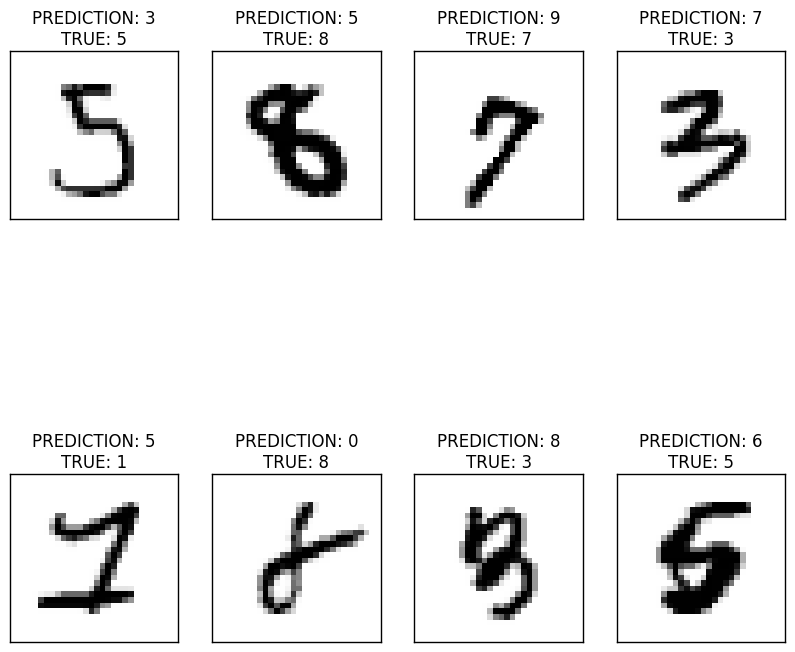

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(10,10))

random_idx = np.random.randint(0, len(wrong_pred), 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(wrong_pred[random_idx[i]][0])
    ax.set_title("PREDICTION: "+ str(wrong_pred[random_idx[i]][1]) + "\n" +
                "TRUE: " + str(wrong_pred[random_idx[i]][2]))
    ax.set_xticks([])
    ax.set_yticks([])

## CONFUSION MATRIX

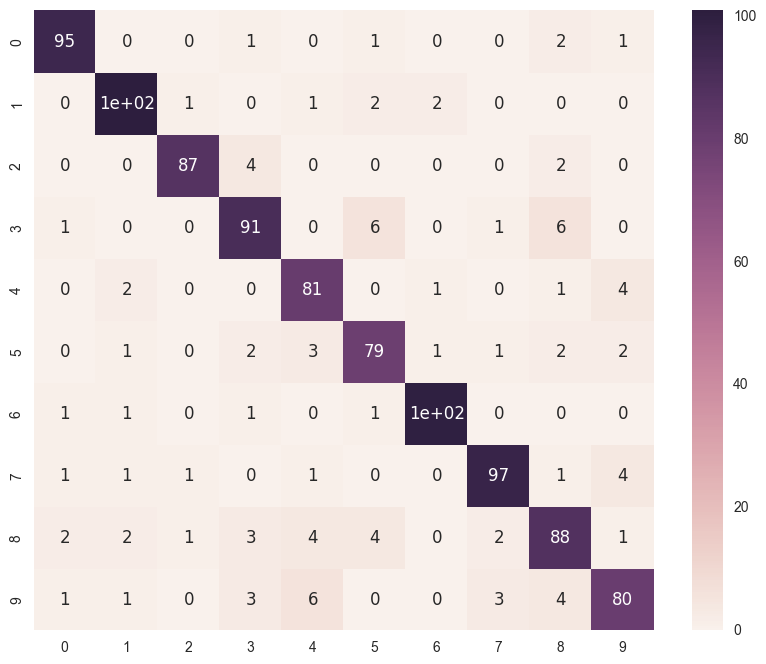

In [10]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(array, index = range(10),
                  columns = range(10))
plt.figure(figsize=(10,8))
sn.heatmap(df_cm, annot=True)